In [94]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# **Анализ динамики высоты нашего самописного дерева в результате вставки случайной последовательности 16383 элементов**

/tmp/ipython-input-164-3872316783.py:59: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-164-3872316783.py:60: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.savefig('tree_height_analysis.png', dpi=130, bbox_inches='tight')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


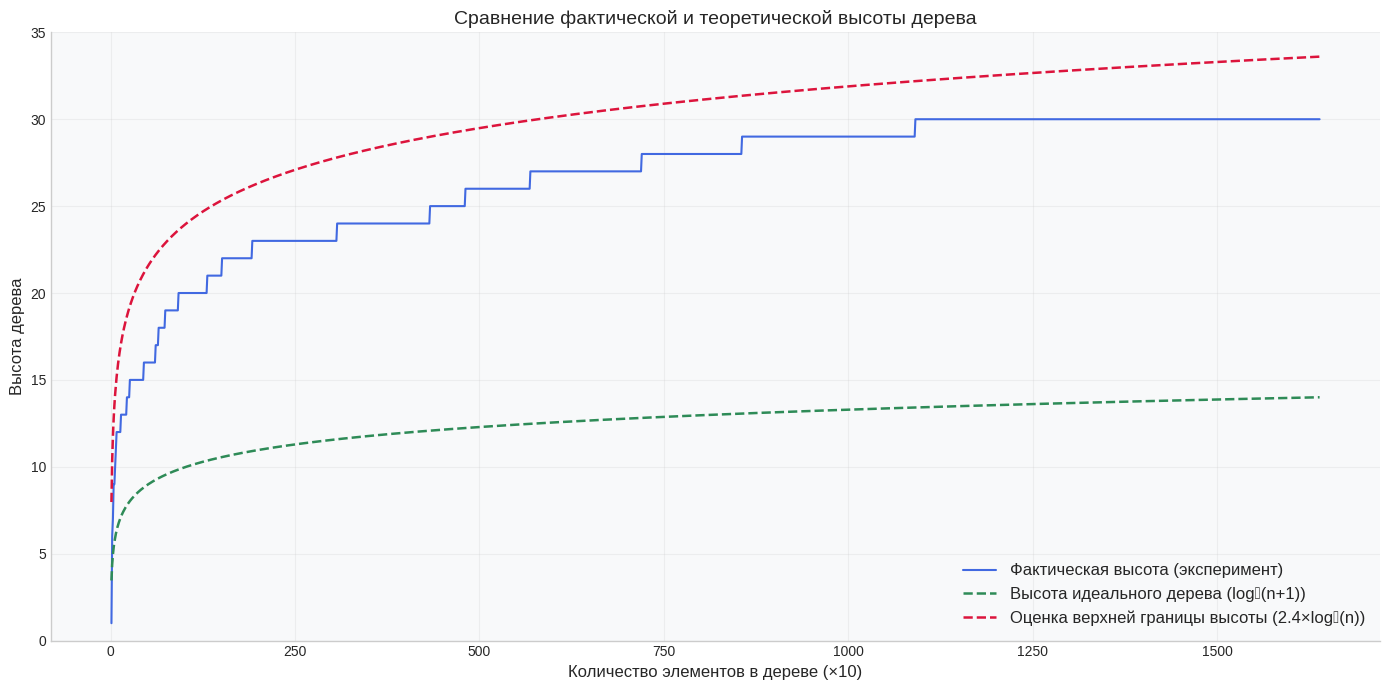

In [164]:
# Чтение данных из CSV
data = pd.read_csv('ourTree - insertHeight.csv', header=None).values.flatten()
n = len(data)

# Создание DataFrame
df = pd.DataFrame({
    'Insertion_Step': range(1, n + 1),
    'Tree_Height': data
})

# Теоретическая оценка высоты дерева (логарифмическая функция)
# Для идеального дерева: h ≈ log2(n + 1)
df['Ideal_Height'] = np.log2(df['Insertion_Step'] * 10 + 1)

# Для верхней границы: h ≈ c * log2(n), где c ≈ 2.4
# Константу с можем подобрать сами, исходя из положения графиков
df['UpperBound_Height'] = 2.4 * np.log2(df['Insertion_Step'] * 10)

# Построение графика
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 7))

# Вывод на график наших экспериментальных данных
plt.plot(df['Insertion_Step'], df['Tree_Height'],
         linestyle='-',
         linewidth=1.5,
         color='royalblue',
         label='Фактическая высота (эксперимент)')

# Вывод на график высоты идеального дерева
plt.plot(df['Insertion_Step'], df['Ideal_Height'],
         linestyle='--',
         linewidth=1.8,
         color='seagreen',
         label='Высота идеального дерева (log₂(n+1))')

# Вывод на график высоты идеального дерева
plt.plot(df['Insertion_Step'], df['UpperBound_Height'],
         linestyle='--',
         linewidth=1.8,
         color='crimson',
         label='Оценка верхней границы высоты (2.4×log₂(n))')

plt.title('Сравнение фактической и теоретической высоты дерева', fontsize=14)
plt.xlabel('Количество элементов в дереве (×10)', fontsize=12)
plt.ylabel('Высота дерева', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.25)

# Установка пределов по оси Y для лучшей визуализации
max_height = max(data) + 5
plt.ylim(0, max_height)

# Добавление сетки и оформления
plt.gca().set_facecolor('#f8f9fa')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('tree_height_analysis.png', dpi=130, bbox_inches='tight')
plt.show()

*   По результатам анализа наших экспериментальных данных
видим, что высота нашего самописного дерева поиска превосходит идеальную оценку log2(n+1) примерно в 2.5 раза
*   В литературе также приводится оценка константы для верхней границы, равной 4
* Перемешивание значений при вставке в дерево поиска действительно дает неплохую базовую балансировку. Для повышения убедительности экспериментальных результатов следует проводить замеры высоты для большего количества значений

# **Анализ динамики реального времени вставки в нашем самописном дереве для случайной последовательности 16383 элементов**

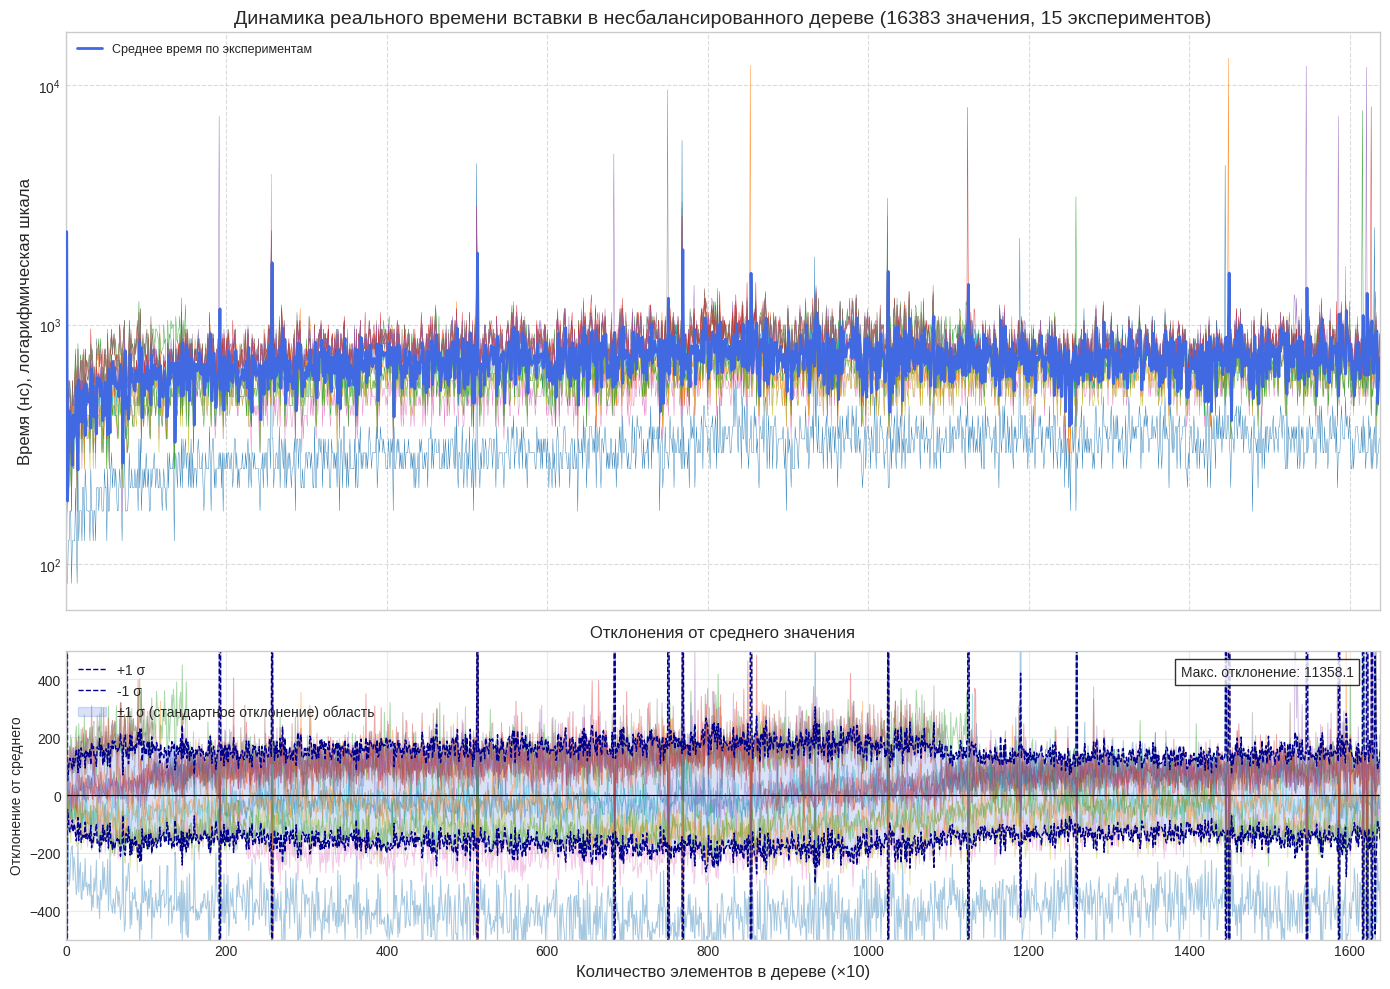

In [166]:
# Чтение данных из файла, уберем последний пустой столбец
df2 = pd.read_csv('ourTree - insertTime.csv', encoding='utf-8', header=None)
df2.drop(df2.columns[-1], axis=1, inplace=True)

# Создание фигуры с двумя графиками
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True,
                              gridspec_kw={'height_ratios': [2, 1]})

# Обработка каждой строки данных и вывод данных на первый график
for i, row in df2.iterrows():
    # Преобразование строки в список и удаление пустых значений (из последнего столбца)
    # Альтернатива исключению последнего столбца при чтении данных
    data = [x for x in row.values if not (isinstance(x, float) and np.isnan(x)) and x != ' ']

    # Извлечение номера эксперимента (его возможно использовать в легенде) и данных
    exp_name = data[0]
    times = list(map(int, data[1:]))

    # Построение графика для эксперимента
    ax1.plot(times, linewidth=0.3)

# Вычисление статистических характеристик данных
# Надо убрать 1 столбец, так как там названия экспериментов
df2.drop(df2.columns[0], axis=1, inplace=True)

mean_values = df2.mean(axis=0)               # среднее время
std_dev = df2.std(axis=0)                    # стандартное отклонение
max_dev = df2.max(axis=0) - mean_values      # максимальное отклонение
min_dev = df2.min(axis=0) - mean_values      # минимальное отклонение

# Линия среднего значения (на первом графике)
ax1.plot(mean_values.index.astype(int), mean_values,
        color='royalblue', linewidth=2,
        label='Среднее время по экспериментам', zorder=10)

# Посчитаем и выведем на второй график, насколько отличаются данные замеров
# времени от среднего в рамках каждого эксперимента
for i, row in df2.iterrows():
    data = [x for x in row.values]
    deviations = data - mean_values
    ax2.plot(deviations.index.astype(int), deviations,
             linewidth=0.7, alpha=0.4)

# Также на втором графике обозначим область, ограниченную станд. отклонением
ax2.plot(std_dev.index.astype(int), std_dev,
        color='darkblue', linewidth=1, linestyle='--', label='+1 σ')
ax2.plot(std_dev.index.astype(int), -std_dev,
        color='darkblue', linewidth=1, linestyle='--', label='-1 σ')
ax2.fill_between(std_dev.index.astype(int),
                -std_dev,
                std_dev,
                color='royalblue', alpha=0.2,
                label='±1 σ (стандартное отклонение) область')

# Настройка оформления первого графика
ax1.set_title('Динамика реального времени вставки в несбалансированного дереве (16383 значения, 15 экспериментов)',
              fontsize=14)
ax1.set_ylabel('Время (нс), логарифмическая шкала', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(fontsize=9, loc='best')
# Сделаем логарфмическую шкалу, так как значения очень близки
ax1.set_yscale('log')

ax2.set_title('Отклонения от среднего значения', pad=10)
ax2.set_xlabel('Количество элементов в дереве (×10)', fontsize=12)
ax2.set_ylabel('Отклонение от среднего')
ax2.axhline(y=0, color='black', linewidth=0.8, linestyle='-')
ax2.legend(loc='upper left')
ax2.set_xlim(0, 1638)
ax2.grid(alpha=0.4)
# границы подобраны так, чтобы была лучше видна область внутри ст. откл.
ax2.set_ylim(-500, 500)

# Добавление информации о масштабе отклонений
max_abs_dev = max(np.abs(min_dev.max()), np.abs(max_dev.max()))
ax2.text(0.98, 0.95, f'Макс. отклонение: {max_abs_dev:.1f}',
        transform=ax2.transAxes, ha='right', va='top',
        bbox=dict(facecolor='white', alpha=0.8))

# Автоматическая настройка макета и сохранение графика
plt.tight_layout()
plt.savefig('tree_time_analysis.png', dpi=130, bbox_inches='tight')

# Показать график
plt.show()



*   Можем оценить, насколько изменчиво конкретное реально время работы вставки элементов в дереве в рамках проведенных экспериментов
*   Второй график показывает, что большинство замеров укладываются в область, ограниченную стандартным отклонением (мерой изменчивости данных). Можно отметить, что с ростом количества элементов в дереве области отклонения сужается.
* Надо отметить, что график также довольно "скученный", поскольку значения близки друг к другу

